<a href="https://colab.research.google.com/github/Gabxist/I.C./blob/main/An%C3%A1lise_de_dados_%22GPS%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicializadores

In [115]:
from pandas import read_csv, to_datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from pandas.plotting import autocorrelation_plot
from seaborn import pairplot

In [2]:
# Importar repósitorio de GitHub
!rm -r I.C.
!git clone https://github.com/Gabxist/I.C..git

rm: cannot remove 'I.C.': No such file or directory
Cloning into 'I.C.'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 66 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 15.35 MiB | 5.28 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [31]:
gps = read_csv('/content/I.C./Gps_NAUS.txt',names=['DATE','TIME','DECIMAL DATE','MJD','U'], sep=r'\s+')

In [46]:
rio_amz = read_csv('/content/I.C./dados_rio_amazonas.CSV',names=['DATE','TIME','DECIMAL DATE','CHUVA','VASAO'],sep = ';')

# GPS


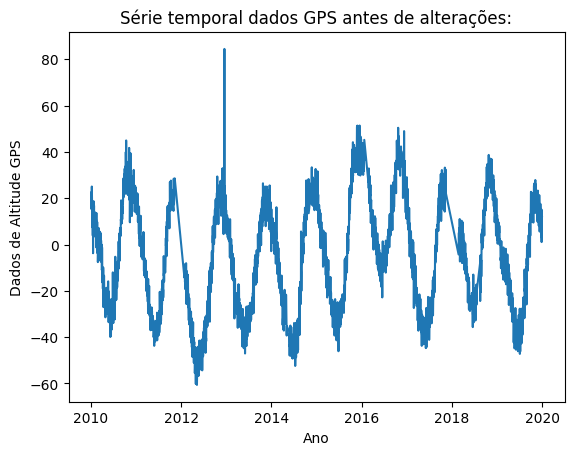

In [33]:
#Deixando apenas os ultimos 10 anos:
remover = gps[(gps['DECIMAL DATE']<2010)|(gps['DECIMAL DATE']>2020)]
gps = gps.drop(remover.index)
#retirando linhas vazias do dataframe:
gps = gps.dropna(subset = 'U')
#plotando serie temporal
plt.plot(gps['DECIMAL DATE'], gps['U'])
plt.xlabel('Ano')
plt.ylabel('Dados de Altitude GPS')
plt.title('Série temporal dados GPS antes de alterações:')
plt.show()

In [34]:
#outliers por IQR (análise inter quartil com coeficiente 1,5):
q1 = gps["U"].quantile(0.25)
q3 = gps['U'].quantile(0.75)
iqr = q3 - q1
tol_min = q1 - 1.5 * iqr
tol_max = q3 + 1.5 * iqr
outliers = gps[(gps['U']<tol_min)|(gps['U']> tol_max)]
print(outliers)

            DATE      TIME  DECIMAL DATE      MJD          U
2343  15/12/2012  12:00:00   2012.954918  56276.5  78.136257
2344  16/12/2012  12:00:00   2012.957650  56277.5  84.477328


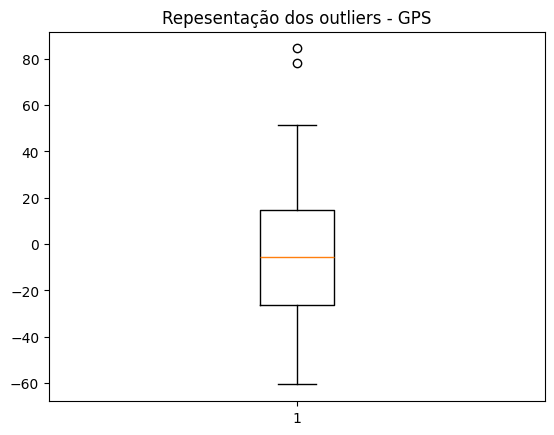

In [35]:
# representação dos Outliers por Boxplot
plt.boxplot(gps['U'])
plt.title('Repesentação dos outliers - GPS')
plt.show()

In [36]:
# criando novo dataframe com os dados GPS, sem os outliers
gps_o = gps.drop(outliers.index)

In [37]:
#retirando a média
média = np.mean(gps['U'])
gps['U'] = gps['U'] - média
print(f'Média dos dados "U": {média:.2f}')
média = np.mean(gps_o['U'])
gps_o['U'] = gps_o['U'] - média
print(f'Média dos dados "U" sem outliers: {média:.2f}')

Média dos dados "U": -5.27
Média dos dados "U" sem outliers: -5.32


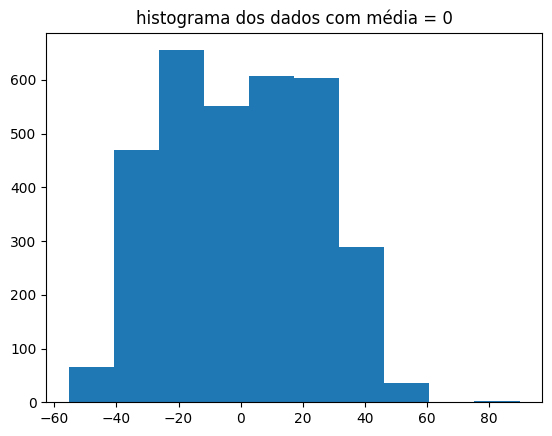

In [38]:
plt.hist(gps['U'])
plt.title('histograma dos dados com média = 0')
plt.show()

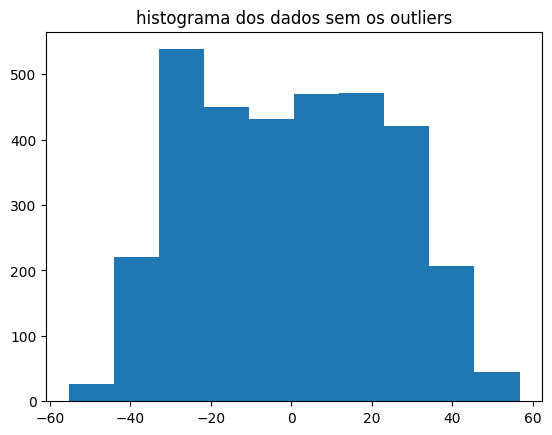

In [39]:
plt.hist(gps_o['U'])
plt.title('histograma dos dados sem os outliers')
plt.show()

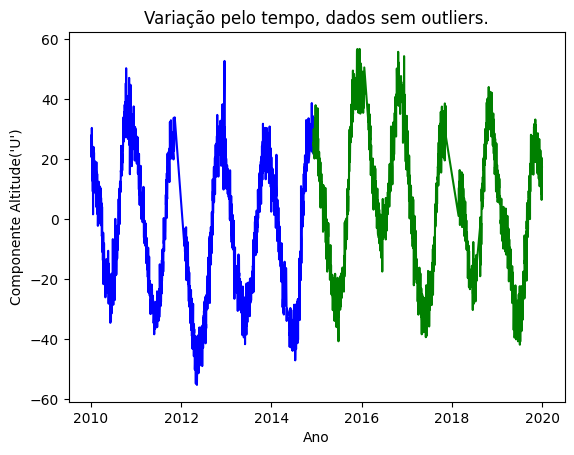

primeira metade, variância = 534.5308579407011 média = -4.732930755906695
segunda metade, variância = 549.9853001753089 média = 4.730043061729815
Falhou em rejeitar a hipótese nula de variância igual entre grupos.
P-valor: 0.5987966982800148.


In [40]:
#plotando a serie temporal em duas metades e calculando a hipotese de variancia nula entre as metades:
metade = round(len(gps_o)/2)
div1, div2 = gps_o["U"].to_numpy()[0:metade], gps_o["U"].to_numpy()[metade:]
time1, time2 = gps_o["DECIMAL DATE"].to_numpy()[0:metade], gps_o["DECIMAL DATE"].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Altitude('U')")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var()} média = {div1.mean()}")
print(f"segunda metade, variância = {div2.var()} média = {div2.mean()}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]}.')

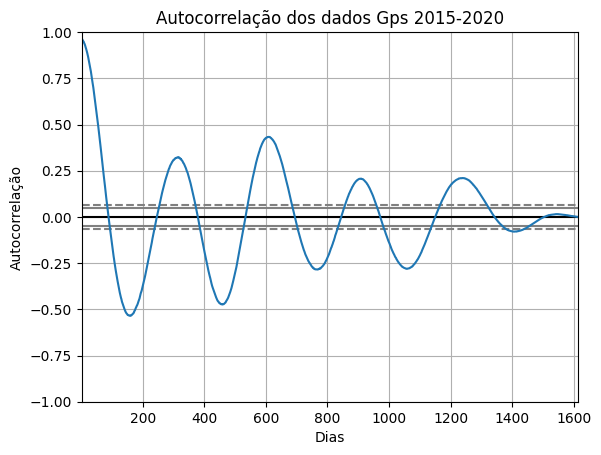

In [56]:
# Utilizando apenas os ultimos 5 anos de dados
ult_5_anos_gps = gps_o[(gps_o["DECIMAL DATE"])>2015]
#Plotando o grafico de Autocorrelação entre os dados GPS
autocorrelation_plot(ult_5_anos_gps['U'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados Gps 2015-2020")
plt.show()

# Dados Rio Amazonas / Rio Negro


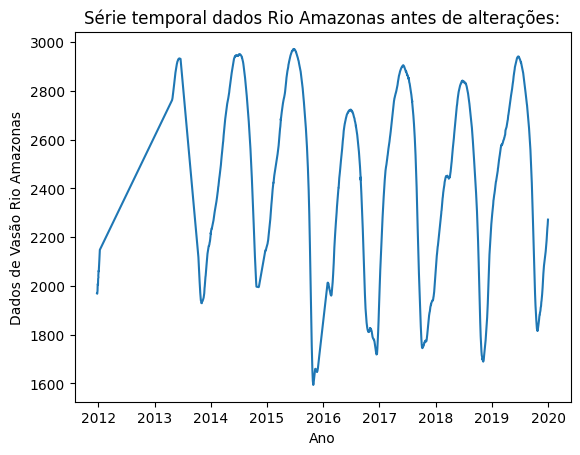

In [47]:
#Deixando apenas os ultimos 10 anos:
remover = rio_amz[(rio_amz['DECIMAL DATE']<2010)|(rio_amz['DECIMAL DATE']>2020)]
rio_amz = rio_amz.drop(remover.index)
# deixando somente os dados comparaveis com a série GPS "hora == 12:00:00"
remover = rio_amz[(rio_amz['TIME'] != '12:00:00')]
rio_amz = rio_amz.drop(remover.index)
#retirando as linhas vazias
rio_amz = rio_amz.dropna(subset = ['VASAO'])
#plotando serie temporal
plt.plot(rio_amz['DECIMAL DATE'],rio_amz['VASAO'])
plt.xlabel('Ano')
plt.ylabel('Dados de Vasão Rio Amazonas')
plt.title('Série temporal dados Rio Amazonas antes de alterações:')
plt.show()

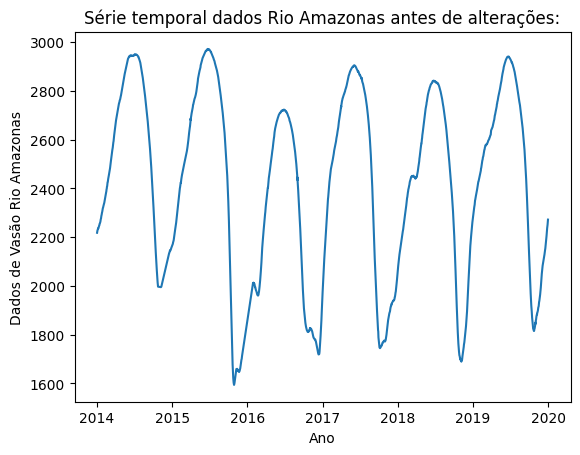

In [48]:
#observa-se que há quebra nos dados, por isso será necessário alterar a quantidade de anos a serem analisados
#Deixando apenas os ultimos 6 anos:
remover = rio_amz[(rio_amz['DECIMAL DATE']<2014)|(rio_amz['DECIMAL DATE']>2020)]
rio_amz = rio_amz.drop(remover.index)
#plotando os dados da serie temporal:
plt.plot(rio_amz['DECIMAL DATE'],rio_amz['VASAO'])
plt.xlabel('Ano')
plt.ylabel('Dados de Vasão Rio Amazonas')
plt.title('Série temporal dados Rio Amazonas antes de alterações:')
plt.show()

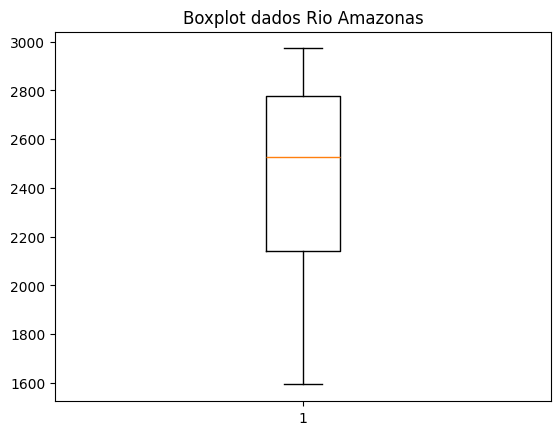

In [50]:
#representação de outliers por Boxplot
plt.boxplot(rio_amz['VASAO'])
plt.title('Boxplot dados Rio Amazonas')
plt.show()

In [73]:
#observa-se que não há outliers, assim não sendo necessáirio criar um novo dataframe para retirar os outliers

In [51]:
#retirando a média
média = np.mean(rio_amz['VASAO'])
rio_amz['VASAO'] = rio_amz['VASAO'] - média
print(f'Média dos dados "U": {média:.2f}')

Média dos dados "U": 2443.14


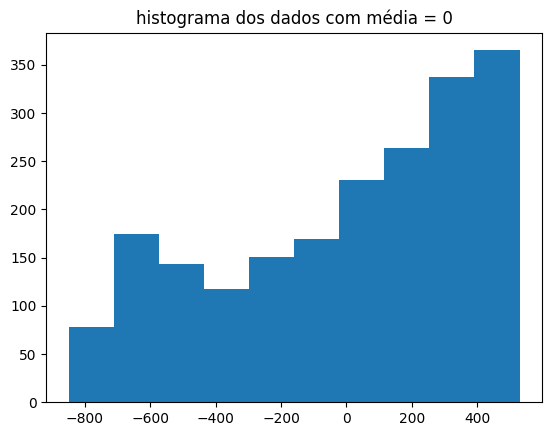

In [75]:
plt.hist(rio_amz['VASAO'])
plt.title('histograma dos dados com média = 0')
plt.show()

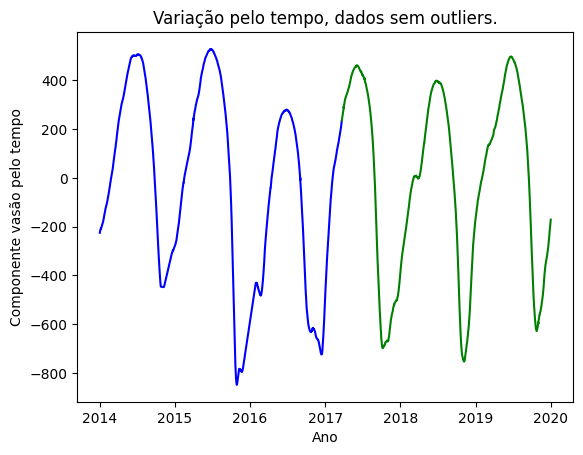

primeira metade, variância = 153197.84601873765 média = 6.44597633136122
segunda metade, variância = 147289.1812370307 média = -6.445976331360704
Falhou em rejeitar a hipótese nula de variância igual entre grupos.
P-valor: 0.6320427701599147.


In [52]:
metade = round(len(rio_amz)/2)
div1, div2 = rio_amz['VASAO'].to_numpy()[0:metade], rio_amz['VASAO'].to_numpy()[metade:]
time1, time2 = rio_amz['DECIMAL DATE'].to_numpy()[0:metade], rio_amz['DECIMAL DATE'].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente vasão pelo tempo")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var()} média = {div1.mean()}")
print(f"segunda metade, variância = {div2.var()} média = {div2.mean()}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]}.')

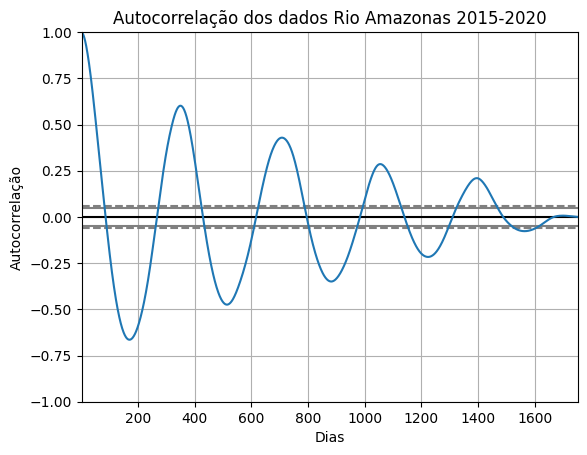

In [55]:
ult_5_anos_rio = rio_amz[(rio_amz['DECIMAL DATE'])>2015]
autocorrelation_plot(ult_5_anos_rio['VASAO'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados Rio Amazonas 2015-2020")
plt.show()

# Correlação Cruzada

In [122]:
#Criando um dataframe juntando os dados dos dois dataframes com os dados dos ultimos 5 anos:
# função para facilitar o tratamento dos dados:
def mudar_dados (nome):
  '''
  Altera as duas colunas de data e hora em uma só para facilitar o tratamento dos dados.
    '''
  nome['datetime'] = nome['DATE']+" "+nome["TIME"]
  nome['datetime'] = to_datetime(nome['datetime'],format="%d/%m/%Y %H:%M:%S")
  nome.set_index(['datetime'],inplace=True)
  return nome

aux1 = ult_5_anos_gps.copy()
aux2 = ult_5_anos_rio.copy()
aux1 = mudar_dados(aux1)
aux2 = mudar_dados(aux2)
juntos = aux1.join(aux2[['VASAO']], how='left')
juntos.dropna()

,DATE,TIME,DECIMAL DATE,MJD,U,VASAO
datetime,,,,,,
2015-01-03 12:00:00,03/01/2015,12:00:00,2015.006849,57025.5,20.208623,-273.020947
2015-01-04 12:00:00,04/01/2015,12:00:00,2015.009589,57026.5,25.786681,-269.990947
2015-01-05 12:00:00,05/01/2015,12:00:00,2015.012329,57027.5,32.057943,-264.140947
2015-01-06 12:00:00,06/01/2015,12:00:00,2015.015068,57028.5,27.310868,-262.140947
2015-01-07 12:00:00,07/01/2015,12:00:00,2015.017808,57029.5,27.183878,-258.140947
...,...,...,...,...,...,...
2019-12-27 12:00:00,27/12/2019,12:00:00,2019.987671,58844.5,20.430166,-206.140947
2019-12-28 12:00:00,28/12/2019,12:00:00,2019.990411,58845.5,6.371825,-200.140947
2019-12-29 12:00:00,29/12/2019,12:00:00,2019.993151,58846.5,15.841169,-192.140947


In [130]:
juntos['U'] = (juntos['U']-juntos['U'].mean() )/juntos['U'].std()
juntos['VASAO'] = (juntos['VASAO']-juntos['VASAO'].mean())/juntos['VASAO'].std()
juntos.dropna()

,DATE,TIME,DECIMAL DATE,MJD,U,VASAO
datetime,,,,,,
2015-01-03 12:00:00,03/01/2015,12:00:00,2015.006849,57025.5,0.673885,-0.681864
2015-01-04 12:00:00,04/01/2015,12:00:00,2015.009589,57026.5,0.911429,-0.674200
2015-01-05 12:00:00,05/01/2015,12:00:00,2015.012329,57027.5,1.178494,-0.659403
2015-01-06 12:00:00,06/01/2015,12:00:00,2015.015068,57028.5,0.976338,-0.654344
2015-01-07 12:00:00,07/01/2015,12:00:00,2015.017808,57029.5,0.970930,-0.644227
...,...,...,...,...,...,...
2019-12-27 12:00:00,27/12/2019,12:00:00,2019.987671,58844.5,0.683320,-0.512698
2019-12-28 12:00:00,28/12/2019,12:00:00,2019.990411,58845.5,0.084639,-0.497522
2019-12-29 12:00:00,29/12/2019,12:00:00,2019.993151,58846.5,0.487895,-0.477287


In [ ]:
juntos1 = juntos

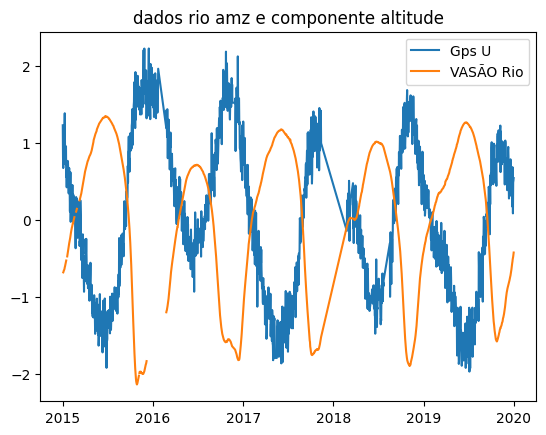

In [131]:
plt.plot(juntos1['DECIMAL DATE'],juntos1['U'], label= 'Gps U')
plt.plot(juntos1['DECIMAL DATE'],juntos1['VASAO'], label = 'VASÃO Rio')
plt.title('dados rio amz e componente altitude')
plt.legend()
plt.show()

[nan nan nan ... nan nan nan]


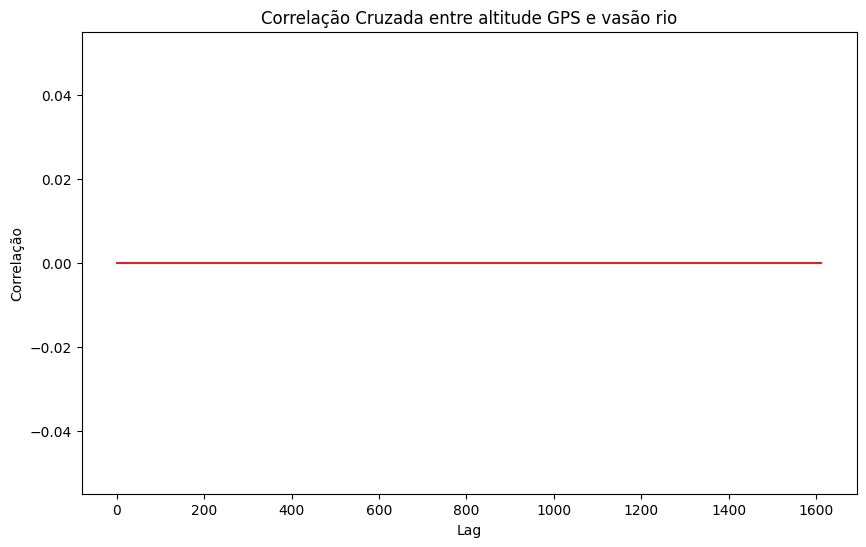

In [133]:
from statsmodels.tsa.stattools import ccf
#Calculando a correlação cruzada entre 'Coluna1' e 'Coluna2'
cross_corr = ccf(juntos1['U'], juntos1['VASAO'])
# Exibindo a correlação cruzada
print(cross_corr)
# Plotando a correlação cruzada
plt.figure(figsize=(10, 6))
plt.stem(range(len(cross_corr)), cross_corr)
plt.title('Correlação Cruzada entre altitude GPS e vasão rio')
plt.xlabel('Lag')
plt.ylabel('Correlação')
plt.show()